# Jaguar_Cassification 

objective: the objective is to 
train a network to detect whether there is a jaguar or not 



the labels are two: 
jaguar or no-jaguar 

this notebook is based on the work 
https://github.com/MaxSob/ML_Notebooks/blob/main/Fashion%20MNIST%20in%20Keras.ipynb


The network structure is described below




In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential                  # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import fashion_mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils     
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf

In [13]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/idea_1/train/'
validation_data_dir = 'data/idea_1/test/'
#values to train the netwrok 
nb_train_samples = 1000
nb_validation_samples = 300
epochs = 20
batch_size = 16

In [14]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten,  BatchNormalization

model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(128))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.5))                              # 20% dropout of randomly selected nodes
model.add(Dense(1))                                 # final 10 FCN nodes
model.add(Activation('sigmoid'))    

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [17]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [18]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [19]:
#loading the data 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    #color_mode="grayscale",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 700 images belonging to 2 classes.


In [20]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    #color_mode="grayscale",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 296 images belonging to 2 classes.


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 batch_normalization_6 (Batc  (None, 146, 146, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 146, 146, 32)     

In [22]:
epochs = 50
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs
)

Epoch 1/50
44/44 [==============================] - 79s 2s/step - loss: 0.8373 - accuracy: 0.5757 - val_loss: 0.6361 - val_accuracy: 0.7230
Epoch 2/50
44/44 [==============================] - 76s 2s/step - loss: 0.6855 - accuracy: 0.6600 - val_loss: 0.9443 - val_accuracy: 0.4966
Epoch 3/50
44/44 [==============================] - 75s 2s/step - loss: 0.6376 - accuracy: 0.6986 - val_loss: 0.8183 - val_accuracy: 0.4966
Epoch 4/50
44/44 [==============================] - 75s 2s/step - loss: 0.6383 - accuracy: 0.7000 - val_loss: 0.7959 - val_accuracy: 0.4966
Epoch 5/50
44/44 [==============================] - 80s 2s/step - loss: 0.5820 - accuracy: 0.7300 - val_loss: 0.8734 - val_accuracy: 0.5000
Epoch 6/50
44/44 [==============================] - 77s 2s/step - loss: 0.5510 - accuracy: 0.7300 - val_loss: 1.0532 - val_accuracy: 0.5270
Epoch 7/50
44/44 [==============================] - 75s 2s/step - loss: 0.5164 - accuracy: 0.7443 - val_loss: 1.1213 - val_accuracy: 0.5338
Epoch 8/50
44/44 [==

In [23]:
model.save('train_w/idea1/exp1_app1_v2.h5')

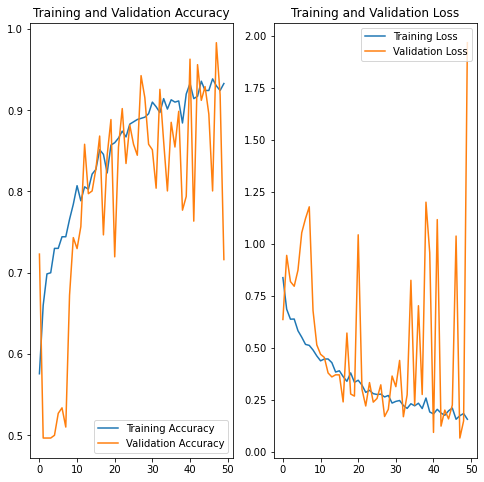

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#we need data to evaluate the model beside the ones we have 

In [25]:
evaluation = model.evaluate(validation_generator, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")


19/19 [==============================] - 11s 587ms/step - loss: 1.9668 - accuracy: 0.7162

loss: 1.9668
accuracy: 0.7162


In [26]:
evaluation = model.evaluate(train_generator, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")


44/44 [==============================] - 24s 533ms/step - loss: 0.5204 - accuracy: 0.8086

loss: 0.5204
accuracy: 0.8086


In [28]:
#load the data 
evaluacion2 = tf.keras.utils.image_dataset_from_directory(
  'data/validation/',
  validation_split=0.2,
  #color_mode="grayscale",
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=16)

Found 65 files belonging to 2 classes.
Using 52 files for training.


In [30]:
evaluation = model.evaluate(evaluacion2, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

4/4 [==============================] - 1s 115ms/step - loss: 1103.1101 - accuracy: 0.6538

loss: 1103.1101
accuracy: 0.6538
